In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [39]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


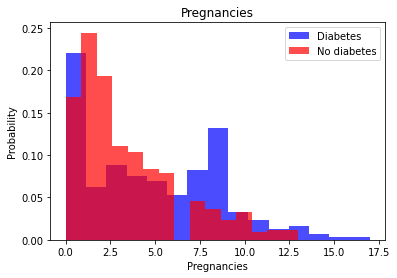

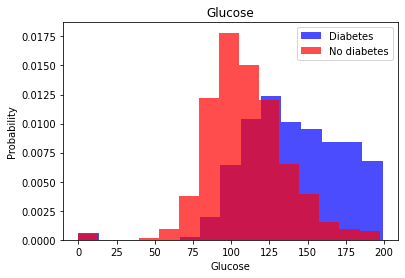

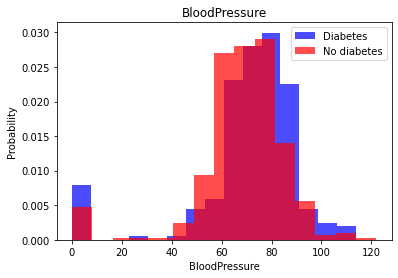

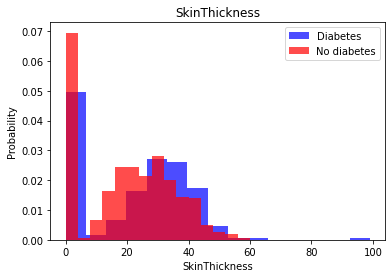

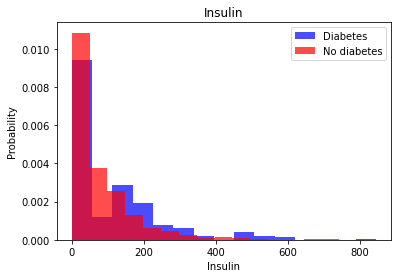

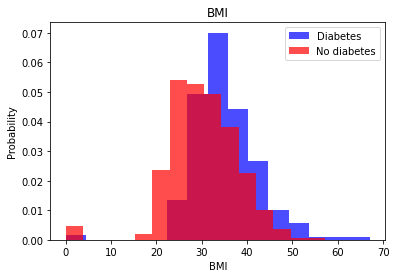

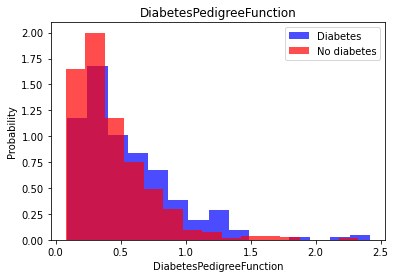

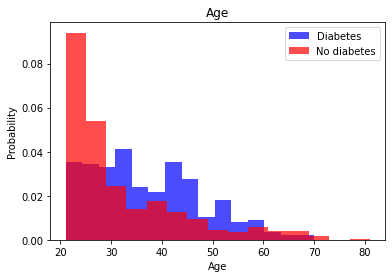

In [42]:
for i in range(len(df.columns[:-1])):
    labels = df.columns[i]
    plt.hist(df[df['Outcome']==1][labels], color='blue', label='Diabetes', alpha=0.7,density=True,bins=15)
    plt.hist(df[df['Outcome']==0][labels], color='red', label='No diabetes',alpha=0.7,density=True,bins=15)
    plt.title(labels)
    plt.xlabel(labels)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [43]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [44]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [45]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [46]:
scalar = StandardScaler()
x = scalar.fit_transform(x)
data = np.hstack((x,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

In [47]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(268, 500)

In [48]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
data = np.hstack((x,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data,columns=df.columns)

In [49]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [50]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [-0.54791859,  1.06740381,  0.25303625, ..., -0.68442195,
        -0.11741105, -0.53102292],
       [ 0.04601433,  0.34756947, -3.57259724, ...,  0.1151693 ,
        -0.51304659, -0.87137393],
       [ 1.23388019, -0.02799627,  0.87340925, ..., -0.4559673 ,
        -0.6429117 , -0.95646168]])

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.4,random_state=0)
x_valid,x_test,y_valid,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=0)

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [53]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
              )

In [54]:
model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 7ms/step - loss: 0.6763 - accuracy: 0.6033 - val_loss: 0.6749 - val_accuracy: 0.6300
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.6833 - val_loss: 0.6308 - val_accuracy: 0.6900
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.7167 - val_loss: 0.5943 - val_accuracy: 0.7050
Epoch 4/20
38/38 [==============================] - 0s 7ms/step - loss: 0.5646 - accuracy: 0.7300 - val_loss: 0.5623 - val_accuracy: 0.7300
Epoch 5/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5430 - accuracy: 0.7233 - val_loss: 0.5390 - val_accuracy: 0.7350
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 0.5298 - accuracy: 0.7267 - val_loss: 0.5207 - val_accuracy: 0.7300
Epoch 7/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5188 - accuracy: 0.7317 - val_loss: 0.5046 - val_accuracy: 0.7400
Epoch 8/20
38/38 [==

In [55]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4668 - accuracy: 0.7750


[0.46682852506637573, 0.7749999761581421]